In [204]:
# Import required libs

# from IPython.display import display
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot

# Load dataset
heartattack_all_LE = pd.read_csv('datasets/heart_attack_risk_dataset.csv')
heartattack_LE_OHE = pd.read_csv('datasets/heart_attack_risk_dataset.csv')

In [205]:
# Initialize Encoders
leGender = LabelEncoder()       # Female, Male
leHML = LabelEncoder()          # High, Moderate, Low
leChestPain = LabelEncoder()    # Non-anginal, Asymptomatic, Typical, Atypical
leThalassemia = LabelEncoder()  # Normal, Fixed Defect, Reversible Defect
leECG = LabelEncoder()          # Normal, ST-T abnormality, Left ventricular hypertrophy

In [206]:
# Encode categorical columns using LE
heartattack_all_LE['Gender'] = leGender.fit_transform(heartattack_all_LE['Gender'])

heartattack_all_LE['Physical_Activity_Level'] = leHML.fit_transform(heartattack_all_LE['Physical_Activity_Level'])
heartattack_all_LE['Stress_Level'] = leHML.fit_transform(heartattack_all_LE['Stress_Level'])
heartattack_all_LE['Heart_Attack_Risk'] = leHML.fit_transform(heartattack_all_LE['Heart_Attack_Risk'])

heartattack_all_LE['Chest_Pain_Type'] = leChestPain.fit_transform(heartattack_all_LE['Chest_Pain_Type'])
heartattack_all_LE['Thalassemia'] = leThalassemia.fit_transform(heartattack_all_LE['Thalassemia'])
heartattack_all_LE['ECG_Results'] = leECG.fit_transform(heartattack_all_LE['ECG_Results'])

In [207]:
# Split DF into Features and Labels
Features_he_all_LE = heartattack_all_LE.iloc[:, :19]
Labels_he_all_LE = heartattack_all_LE.iloc[:, 19:]

# Splitting into Train- and Test-sets
f_train_he_le, f_test_he_le, l_train_he_le, l_test_he_le = train_test_split(
    Features_he_all_LE, 
    Labels_he_all_LE, 
    test_size=0.3, 
    random_state=38
)

In [208]:
# Initialising XGB Classifier
# xgbc =  XGBClassifier()
# xgbc =  XGBClassifier(n_estimators=5, max_depth=2, learning_rate=1, objective='binary:logistic')
xgbc_le =  XGBClassifier(
    objective='multi:softmax',  # Specify the multi-class classification task
    num_class=3,                # Number of classes (Low, Moderate, High)
    max_depth=2,                # Maximum depth of the trees
    learning_rate=0.2,          # Learning rate for the model
    n_estimators=50,            # Number of boosting rounds (iterations)
    random_state=0              # Set random state for reproducibility
)

In [209]:
# Fitting and Predicting
xgbc_le.fit(f_train_he_le, l_train_he_le)
test_preds = xgbc_le.predict(f_test_he_le)
train_preds= xgbc_le.predict(f_train_he_le)

In [210]:
# Evaluation
print(f'Test Accuracy LE: {accuracy_score(l_test_he_le, test_preds)}')
print(f'Train Accuracy LE: {accuracy_score(l_train_he_le, train_preds)}')

Test Accuracy LE: 0.5022
Train Accuracy LE: 0.5000285714285714


[tune-xgboost-performance-with-learning-curves](https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/)

[0]	validation_0-mlogloss:1.07921	validation_1-mlogloss:1.07915
[1]	validation_0-mlogloss:1.06535	validation_1-mlogloss:1.06520
[2]	validation_0-mlogloss:1.05537	validation_1-mlogloss:1.05518
[3]	validation_0-mlogloss:1.04818	validation_1-mlogloss:1.04798
[4]	validation_0-mlogloss:1.04294	validation_1-mlogloss:1.04274
[5]	validation_0-mlogloss:1.03916	validation_1-mlogloss:1.03900
[6]	validation_0-mlogloss:1.03638	validation_1-mlogloss:1.03628
[7]	validation_0-mlogloss:1.03435	validation_1-mlogloss:1.03432
[8]	validation_0-mlogloss:1.03284	validation_1-mlogloss:1.03289
[9]	validation_0-mlogloss:1.03172	validation_1-mlogloss:1.03181
[10]	validation_0-mlogloss:1.03089	validation_1-mlogloss:1.03114
[11]	validation_0-mlogloss:1.03026	validation_1-mlogloss:1.03060
[12]	validation_0-mlogloss:1.02979	validation_1-mlogloss:1.03020
[13]	validation_0-mlogloss:1.02941	validation_1-mlogloss:1.02992
[14]	validation_0-mlogloss:1.02909	validation_1-mlogloss:1.02971
[15]	validation_0-mlogloss:1.02885	

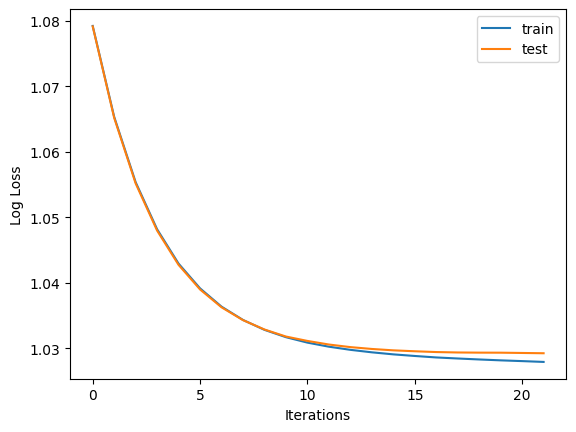

In [211]:
# define the datasets to evaluate each iteration
model = XGBClassifier(objective='multi:softmax',  # Specify the multi-class classification task
    num_class=3,                # Number of classes (Low, Moderate, High)
    max_depth=2,                # Maximum depth of the trees
    learning_rate=0.2,          # Learning rate for the model
    n_estimators=22,            # Number of boosting rounds (iterations) (n=22 best according to brute force eval)
    random_state=0,             # Set random state for reproducibility
    eval_metric='mlogloss'      # alternativ: eval_metric='merror'
)
evalset = [(f_train_he_le, l_train_he_le), (f_test_he_le, l_test_he_le)]


# fit the model
model.fit(f_train_he_le, l_train_he_le, eval_set=evalset)

yhat = model.predict(f_test_he_le)
score = accuracy_score(l_test_he_le, yhat)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = model.evals_result()

pyplot.xlabel('Iterations')
pyplot.ylabel('Log Loss')
# plot learning curves
pyplot.plot(results['validation_0']['mlogloss'], label='train')
pyplot.plot(results['validation_1']['mlogloss'], label='test')
# pyplot.plot(results['validation_0']['merror'], label='train')
# pyplot.plot(results['validation_1']['merror'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [212]:
# print(min(results['validation_0']['mlogloss']))
# print(max(results['validation_0']['mlogloss']))
# print(min(results['validation_1']['mlogloss']))
# print(max(results['validation_1']['mlogloss']))

min_train = min(results['validation_0']['mlogloss'])
max_train = max(results['validation_0']['mlogloss'])
min_test = min(results['validation_1']['mlogloss'])
max_test = max(results['validation_1']['mlogloss'])

print(f'Minimal Training Loss: \t{min_train} at Iteration: {results["validation_0"]["mlogloss"].index(min_train)+1}')
print(f'Minimal Testing Loss: \t{min_test} at Iteration: {results["validation_1"]["mlogloss"].index(min_test)+1}')
print(f'Maximal Training Loss: \t{max_train} at Iteration: {results["validation_0"]["mlogloss"].index(max_train)+1}')
print(f'Maximal Testing Loss: \t{max_test} at Iteration: {results["validation_1"]["mlogloss"].index(max_test)+1}')


Minimal Training Loss: 	1.0279404353499413 at Iteration: 22
Minimal Testing Loss: 	1.0292646631519 at Iteration: 22
Maximal Training Loss: 	1.0792134557247162 at Iteration: 1
Maximal Testing Loss: 	1.0791461881875992 at Iteration: 1
